In [14]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# [Building HMM and generating samples](https://hmmlearn.readthedocs.io/en/latest/tutorial.html#building-hmm-and-generating-samples)

In [15]:
# defining the model: 3 hidden states, full covariance matrix
model = hmm.GaussianHMM(n_components=3, covariance_type="full")

# start probability vector
model.startprob_ = np.array([0.6, 0.3, 0.1])

# transition probability matrix
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])

# normal distribution means
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])

# covariance matrix
model.covars_ = np.tile(np.identity(2), (3, 1, 1))

# generating samples
X, Z = model.sample(100)

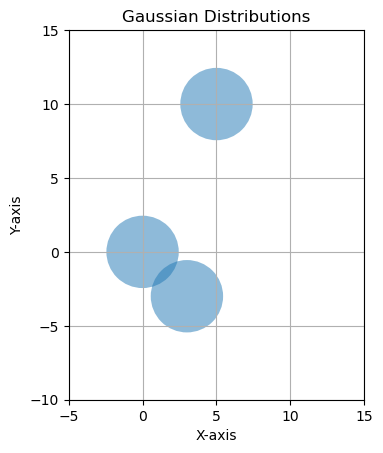

In [16]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the Gaussian distributions as ellipses
for i in range(len(model.means_)):
    covar = model.covars_[i]
    mean = model.means_[i]
    eigenvalues, eigenvectors = np.linalg.eigh(covar)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

    # Create an ellipse representing the Gaussian distribution
    ellipse = Ellipse(xy=mean, width=2 * np.sqrt(5.991 * eigenvalues[0]), height=2 * np.sqrt(5.991 * eigenvalues[1]),
                      angle=angle, alpha=0.5)

    ax.add_patch(ellipse)

# Set axis limits
ax.set_xlim(-5, 15)
ax.set_ylim(-10, 15)

# Set axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Add a title
ax.set_title('Gaussian Distributions')

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Observations')

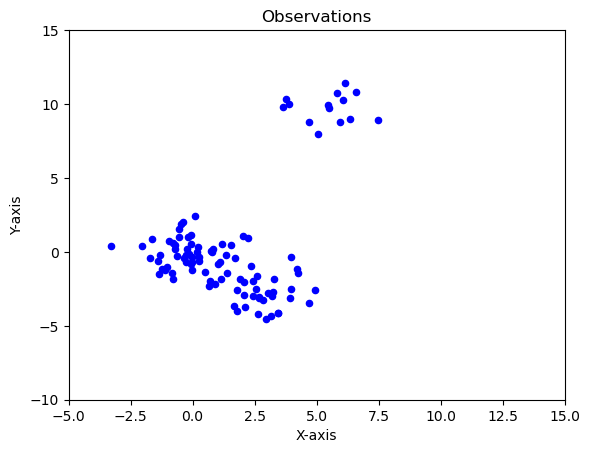

In [17]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create a scatter plot
plt.scatter(X[:, 0], X[:, 1], marker='o', s=20, c='b', label='Data Points')

# Set axis limits
ax.set_xlim(-5, 15)
ax.set_ylim(-10, 15)

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Observations')